In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\apple\Image_1.jpg
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\apple\Image_10.jpg
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\apple\Image_2.jpg
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\apple\Image_3.jpg
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\apple\Image_4.jpg
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\apple\Image_5.jpg
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\apple\Image_6.JPG
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\apple\Image_7.jpg
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\apple\Image_8.jpg
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\apple\Image_9.jpg
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Foodcaldataset\test\banana\Image_1.jpg
C:/Users/Rohan/OneDrive/Desktop/DIP_APPLICATION/Food

In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.12.0


In [9]:
train_dir = Path(r'C:\Users\Rohan\OneDrive\Desktop\DIP_APPLICATION\Foodcaldataset\train')
train_filepaths =list(train_dir.glob(r'**/*.jpg'))

In [10]:
test_dir = Path(r'C:\Users\Rohan\OneDrive\Desktop\DIP_APPLICATION\Foodcaldataset\test')
test_filepaths =list(test_dir.glob(r'**/*.jpg'))

In [11]:
val_dir = Path(r'C:\Users\Rohan\OneDrive\Desktop\DIP_APPLICATION\Foodcaldataset\validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))


In [12]:
def image_processing(filepath):
    if not filepath:
        return pd.DataFrame(columns=['Filepath', 'Label'])

    labels = []
    filepaths = []

    for file in filepath:
        labels.append(Path(file).parent.name)
        filepaths.append(str(file))

    df = pd.DataFrame({'Filepath': filepaths, 'Label': labels})
    df = df.sample(frac=1).reset_index(drop=True)
    return df


In [13]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [14]:
print('--Training set --\n')
print(f'Number of pictures:{train_df.shape[0]}\n')
print(f'Number of different labels:{len(train_df.Label.unique())}\n')
print(f'Labels:{train_df.Label.unique()}')

--Training set --

Number of pictures:2855

Number of different labels:36

Labels:['potato' 'tomato' 'apple' 'turnip' 'spinach' 'capsicum' 'bell pepper'
 'banana' 'eggplant' 'soy beans' 'garlic' 'peas' 'paprika' 'pomegranate'
 'lemon' 'pineapple' 'cucumber' 'ginger' 'grapes' 'carrot' 'beetroot'
 'raddish' 'lettuce' 'chilli pepper' 'jalepeno' 'cauliflower' 'cabbage'
 'kiwi' 'watermelon' 'orange' 'mango' 'pear' 'sweetcorn' 'sweetpotato'
 'corn' 'onion']


In [15]:
train_df.head(5)

,Filepath,Label
0,C:\Users\Rohan\OneDrive\Desktop\DIP_APPLICATIO...,potato
1,C:\Users\Rohan\OneDrive\Desktop\DIP_APPLICATIO...,tomato
2,C:\Users\Rohan\OneDrive\Desktop\DIP_APPLICATIO...,apple
3,C:\Users\Rohan\OneDrive\Desktop\DIP_APPLICATIO...,potato
4,C:\Users\Rohan\OneDrive\Desktop\DIP_APPLICATIO...,turnip


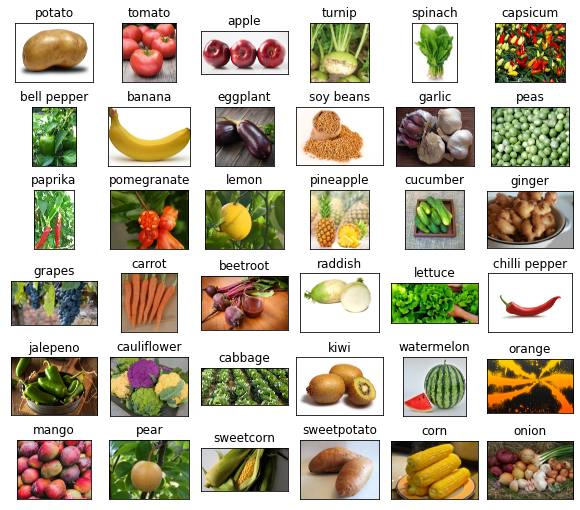

In [16]:
df_unique= train_df.copy().drop_duplicates(subset=["Label"]).reset_index()
fig,axes = plt.subplots(nrows=6,ncols=6,figsize=(8,7),
                       subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i],fontsize=12)
plt.tight_layout(pad=0.5)
plt.show()

In [17]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)


In [18]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),  # Specify target size as a tuple
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


Found 2855 validated image filenames belonging to 36 classes.


In [19]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False


In [26]:
val_images = test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 340 validated image filenames belonging to 36 classes.


In [29]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 340 validated image filenames belonging to 36 classes.


In [27]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(36, activation='softmax')(x) 

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size=32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)




Epoch 1/5
90/90 [==============================] - 155s 2s/step - loss: 1.8335 - accuracy: 0.5131 - val_loss: 0.5267 - val_accuracy: 0.8412
Epoch 2/5
90/90 [==============================] - 127s 1s/step - loss: 0.5898 - accuracy: 0.8172 - val_loss: 0.3362 - val_accuracy: 0.9118
Epoch 3/5
90/90 [==============================] - 123s 1s/step - loss: 0.3486 - accuracy: 0.8851 - val_loss: 0.2635 - val_accuracy: 0.9412
Epoch 4/5
90/90 [==============================] - 125s 1s/step - loss: 0.2217 - accuracy: 0.9317 - val_loss: 0.2221 - val_accuracy: 0.9471
Epoch 5/5
90/90 [==============================] - 124s 1s/step - loss: 0.1504 - accuracy: 0.9524 - val_loss: 0.2322 - val_accuracy: 0.9441


In [30]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

labels=(train_images.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred1=[labels[k] for k in pred]
pred1

11/11 [==============================] - 18s 2s/step


['carrot',
 'jalepeno',
 'pomegranate',
 'cabbage',
 'sweetpotato',
 'apple',
 'bell pepper',
 'grapes',
 'cauliflower',
 'pineapple',
 'pineapple',
 'cabbage',
 'eggplant',
 'lemon',
 'lettuce',
 'pineapple',
 'banana',
 'ginger',
 'bell pepper',
 'orange',
 'cauliflower',
 'paprika',
 'chilli pepper',
 'tomato',
 'chilli pepper',
 'onion',
 'grapes',
 'corn',
 'garlic',
 'mango',
 'mango',
 'cucumber',
 'pineapple',
 'bell pepper',
 'jalepeno',
 'turnip',
 'ginger',
 'ginger',
 'banana',
 'sweetcorn',
 'tomato',
 'jalepeno',
 'paprika',
 'watermelon',
 'turnip',
 'soy beans',
 'grapes',
 'carrot',
 'apple',
 'grapes',
 'paprika',
 'peas',
 'pomegranate',
 'raddish',
 'corn',
 'orange',
 'eggplant',
 'watermelon',
 'cauliflower',
 'cabbage',
 'orange',
 'apple',
 'soy beans',
 'bell pepper',
 'pomegranate',
 'paprika',
 'chilli pepper',
 'spinach',
 'orange',
 'pineapple',
 'jalepeno',
 'soy beans',
 'eggplant',
 'bell pepper',
 'pomegranate',
 'ginger',
 'carrot',
 'cabbage',
 'mango

In [32]:
def output(location):
    img = load_img(location, target_size=(224, 224))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    answer = model.predict(img)
    y_class = np.argmax(answer, axis=-1)
    y = int(y_class)
    res = labels[y]
    return res


In [56]:
img = output(r'C:\Users\Rohan\OneDrive\Desktop\DIP_APPLICATION\Foodcaldataset\test\carrot\Image_3.jpg')
print(img)


1/1 [==============================] - 0s 31ms/step
carrot


In [57]:
model.save('FV.h5')

In [67]:
import requests
from bs4 import BeautifulSoup

def fetch_calories(food_item):
    try:
        url = 'https://www.google.com/search?&q=calories in ' + food_item
        req = requests.get(url).text
        scrap = BeautifulSoup(req, 'html.parser')
        calories = scrap.find("div", class_="BNeawe iBp4i AP7Wnd").text
        return calories
    except Exception as e:
        return "Error fetching calories"

# Example usage
food_item = img  
calories = fetch_calories(food_item)
print("Calorie present per serving in" " " +img+  " is equal to")
print(calories)


Calorie present per serving in carrot is equal to
41 calories
